## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [325]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [326]:
misc.imresize??

In [327]:
# Display the real image of lena
img_path = './images/'
img_name = 'lena-grey.bmp'
lena = io.imread(img_path.__add__(img_name))

# Convert lena image as float
from skimage import img_as_float
lena_float = img_as_float(lena)

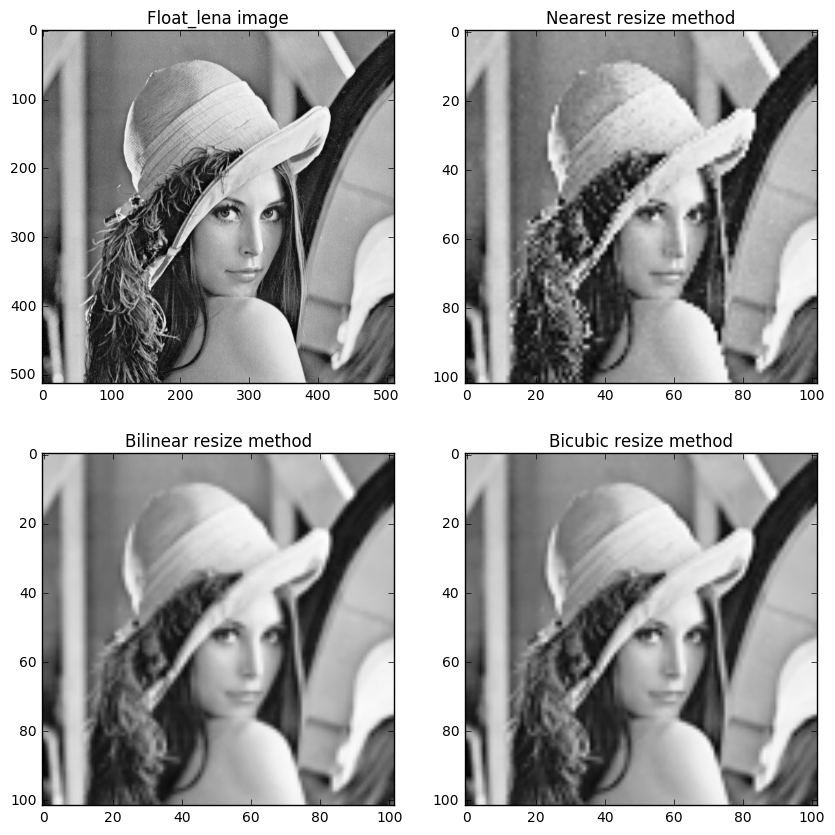

In [34]:
# Resizing the lena image using the nearest function 
im_resize_near = misc.imresize(lena_float,0.2, interp='nearest', mode=None)

# Resizing the lena image using the bilinear function 
im_resize_bilinear = misc.imresize(lena_float,0.2, interp='bilinear', mode=None)

# Resizing the lena image using the bicubic function 
im_resize_bicubic = misc.imresize(lena_float,0.2, interp='bicubic', mode=None)

# Subplot the all the images
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()

# Show the lena image and its histogram 
ax0.imshow(lena_float, cmap=cm.Greys_r)
ax0.set_title('Float_lena image') 
ax1.imshow(im_resize_near,cmap=cm.Greys_r)
ax1.set_title('Nearest resize method')
ax2.imshow(im_resize_bilinear,cmap=cm.Greys_r)
ax2.set_title('Bilinear resize method')
ax3.imshow(im_resize_bicubic,cmap=cm.Greys_r)
ax3.set_title('Bicubic resize method')


**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [328]:
# To crop the half right of the image 
def cropleft(img,cropx):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y 
    return img[:starty,:cropx]


In [381]:
# To crop the half left of the image 
def cropright(img1,cropx1):
    y1,x1,c1 = img1.shape
    startx1 = x1//2 -(cropx1//2)
    starty1 = y1
    return img1[:starty1,cropx1:]

In [403]:
# Function which will simply blend 2 images
def blend(img_1,img_2,crop):
    y_1,x_1,c_1 = img_1.shape
    startx_1= x_1//2-(crop//2)
    starty_1 = y_1 
    
    y_2,x_2,c_2 = img_2.shape
    startx_2 = x_2//2 -(crop//2)
    starty_2 = y_2
    
    im1=(img_1[:starty_1,:crop])
    im2=(img_2[:starty_2,crop:])
    
    new = np.concatenate((im1,im2),axis=1)
    
    return new
   

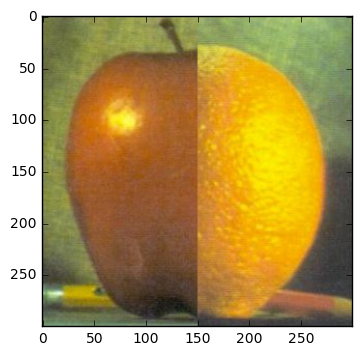

In [404]:
import numpy as np
import matplotlib.pyplot as plt
orange_name = 'orange.jpeg'
orange = io.imread(img_path.__add__(orange_name))
org =img_as_float(orange)

apple_name = 'apple.jpeg'
apple = io.imread(img_path.__add__(apple_name))
apl =img_as_float(apple)

yleft= (cropleft(org,150))
#io.imshow(yleft)

yright= (cropright(apl,150))
#io.imshow(yright)

y = (blend(apl,org,150))
plt.imshow(y)



AttributeError: 'str' object has no attribute 'crop'